<a href="https://colab.research.google.com/github/JvdAli/Cardiovascular_Risk_Prediction/blob/main/Potato_Leaf_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**        - Potato Leaf Disease Prediction

##### **Domain**          - Agriculture
##### **Project Type**    - Deep Learning-Classification
##### **Contribution**    - Individual



# **Project Summary -**
Aim of the project is to create a Neural Network model which takes potato plant leaf image as an input and predicts whether the potato is healthy or diseased(Early Blight or Late Blight).

We will use a kaggle dataset for this project.
This dataset consists of **2,152 images** of **3 different classes**, namely early blight, late blight and healthy. It is a multi-class problem.
*   **Late Blight :** Late blight of potato is a disease caused by fungus Phytophthora infestans.
*   **Early_blight :** Early blight of potato is a disease caused by the fungus Alternaria solani
*   **Healthy :** Uninfected or healthy plant

We will solve this machine learning problem from agriculture domain using **Convolutional Neural Networks(CNNs)** and **Tensorflow2**.

# **GitHub Link -**

**Github Link:**    [Team Github link ](https://github.com/JvdAli/Potato_Disease_Classification)

# **Problem Statement**

Every year, a number of illnesses that impact potato plants cause farmers to sustain significant **financial losses**. The two most common illnesses are Early Blight and Late Blight. Farmers can save a lot of waste and avoid financial loss if they identify early and treat their blight disease. Early blight is caused by **fungus**, whereas late blight is caused by certain microorganisms. It's critical to correctly identify the type of blight present in that potato plant because there are differences in treatment for early and late blight. Convolutional Neural Network - Deep Learning will be used in the background to identify plant illnesses.



##<b>  Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential, models

import matplotlib.pyplot as plt
import pathlib

##<b>  Mounting Drive - Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#<b>  Import data into 'tensorflow dataset object'

**Set all the Constants (hyper parameters)**</br>
These parameters will define key aspects of how the training process will be conducted.

In [3]:
#Set all the Constants
BATCH_SIZE = 32                  #whole dataset partitioned in multiple batches , where each batch consists of 32 images
IMAGE_SIZE = 255                 #Randomly chosen as we do not know the size of the image
CHANNELS=3                       #RGB has 3 channels , Grayscale is having Single channel
EPOCHS=20                        #1 epoch = complete dataset exposure to algorithm in one forward & one backward propagation



*   **BATCH_SIZE :** It represents the number of training examples utilized in one iteration. In simple terms, during each iteration of training, the model updates its weights based on a subset of the entire dataset. The choice of batch size can affect training speed and memory requirements.
*   **IMAGE_SIZE :** This typically refers to the dimensions (width and height) of the input images. The neural network architecture and the training process often depend on the size of the input images. It's essential to ensure consistency in image size to feed into the network.
*   **CHANNEL :** It represents the number of color channels in the input images. For example, RGB images have three channels (Red, Green, Blue). Grayscale images have one channel.








In [4]:
#loading datas using tensorflow dataser object
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Capstone Projects/Potato Leaf Disease Prediction-Deep Learning/Potato Leaf Dataset",
    seed=121,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


*  **seed** The seed parameter sets the random seed for data shuffling and
transformations. Using a fixed seed ensures reproducibility, meaning that if you run the code with the same seed, you should get the same results.

*  **shuffle** The shuffle parameter determines whether to shuffle the data. When set to True, it shuffles the order of the images in each epoch, which is beneficial for training to prevent the model from memorizing the order of the data.

*  **image_size** sets the dimensions to which the input images will be resized. The IMAGE_SIZE variable likely holds a specific size, ensuring that all images are standardized to the same dimensions before being fed into the neural network.

*  **batch_size** parameter defines the number of images in each batch during training. It is set to the value of the BATCH_SIZE variable. Training neural networks in batches helps manage memory efficiently and allows for parallel processing, which can speed up training.

**Checking name of the classes(folders for 3 different category)**

In [5]:
class_names = dataset.class_names       # using class_names function
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

****Numerical representation of the images from 1st batch size of our dataset****

In [6]:
for batch_images ,class_number in dataset.take(1):                               #picking only 1 batch size i.e. dataset.take(1)= 1st batch out of total 68 batches
    print("Image Batch Shape : ", batch_images.shape)
    print("Single Image representation in 3D tensor matrix :", batch_images[0])
    print("1st batch size images contain images from followings classes : ", class_number)


Image Batch Shape :  (32, 255, 255, 3)
Single Image representation in 3D tensor matrix : tf.Tensor(
[[[179.99413  168.99413  172.99413 ]
  [173.99413  162.99413  166.99413 ]
  [172.03531  161.03531  165.03531 ]
  ...
  [165.08614  155.08614  163.08614 ]
  [158.06267  148.06267  156.06267 ]
  [162.01572  152.01572  160.01572 ]]

 [[182.97058  171.97058  175.97058 ]
  [176.97058  165.97058  169.97058 ]
  [175.01176  164.01176  168.01176 ]
  ...
  [174.01169  164.01169  172.01169 ]
  [169.02342  159.02342  167.02342 ]
  [173.98434  163.98434  171.98434 ]]

 [[179.95885  168.95885  172.95885 ]
  [173.96863  162.96863  166.96863 ]
  [172.00972  161.00972  165.00972 ]
  ...
  [170.96077  160.96077  168.96077 ]
  [167.94905  157.94905  165.94905 ]
  [172.9216   162.9216   170.9216  ]]

 ...

 [[105.97847   90.97847   97.97847 ]
  [104.990265  89.990265  96.990265]
  [105.01942   90.01942   97.01942 ]
  ...
  [109.088264  94.088264 101.088264]
  [121.91326  106.91326  113.91326 ]
  [116.92175 

**Conclusion**
*  **Image Batch Shape : (32, 255, 255, 3)**
> 32 : Batch size, representing the number of images in the batch.</br>
> 255: Height of each image.</br>
> 255: Width of each image.</br>
> 3  : Number of color channels (RGB)</br>

*  **Single Image representation in matrix**
> This section shows the pixel values of a single image in the batch. It's a 3D tensor representing the color values of each pixel in the image.
Each pixel has three values (RGB) representing the intensity of red, green, and blue, respectively. The values range from 0 to 255, where 0 is the absence of color, and 255 is the maximum intensity of that color.

*  **label**
> This part shows the labels/classes corresponding to the images in the 1st batch. It's a 1D tensor with a shape of (32), indicating the label for each image in the batch. The labels seem to be integers, ranging from 0 to 2
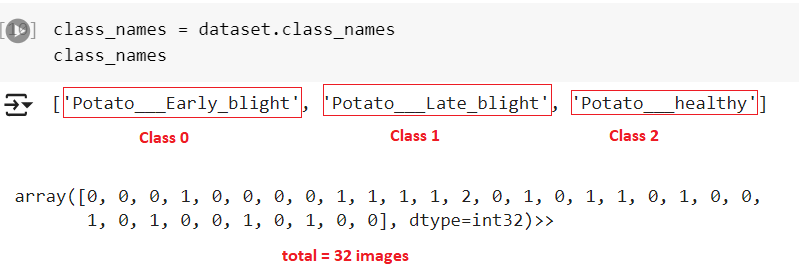



**Visualize some of the images from our dataset**

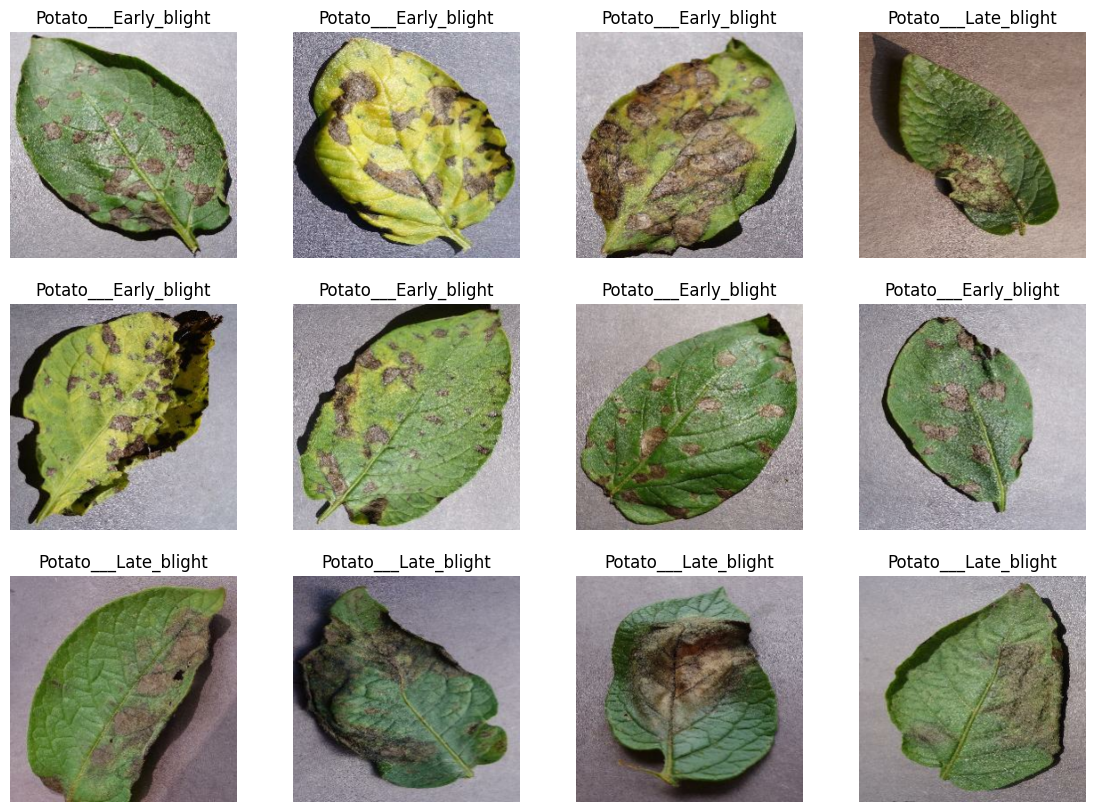

In [7]:
#Visualize some of the images from our dataset
plt.figure(figsize=(14, 10))
for image_batch, labels_batch in dataset.take(1):           # picking only 1 batch size i.e. dataset.take(1) from the entire dataset
    for i in range(12):                                     # 3 rows , 4 columns , displaying only 12 images from abv batch size of 32 images
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# **Data Splitting : Train data, Test data & Validation data**

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)                                    # ds = 68 batches of data from entire dataset

    if shuffle:                                          # shuffling to ensure algorithm doesnt memorize the data sequence
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)           #skip train_size i.e. 54 and take val_size
    test_ds = ds.skip(train_size).skip(val_size)          #skip train_size i.e. 54 & skip val_size i.e. 6

    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
print("Total number of batches in the dataset :{0} \n\nBatch size of Training Data is :{1}\n\nBatch size of Validation Data is :{2} \n\nBatch size of Testing Data is :{3} " .format(len(dataset), len(train_ds), len(val_ds), len(test_ds)))

Total number of batches in the dataset :68 

Batch size of Training Data is :54

Batch size of Validation Data is :6 

Batch size of Testing Data is :8 


# **Input Pipeline Optimization through Cache, Shuffle & Prefetch of the Dataset**

Additional transformations is commonly used in TensorFlow to optimize the performance of the input pipeline when training machine learning models

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# **Building the Model**

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence, we can add that as a layer in our Sequential Model.

Reason for image resizing :You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it


**Creating a Layer for Resizing and Normalization**

In [11]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

**Data Augmentation**</br>

As we all know, training a deep learning model requires a lot of data. To overcome this problem we will use one of the simple and effective methods, called Data Augmentation.

It is a process that generates several realistic variants of each training sample, to artificially expand the size of the training dataset. This aids in the reduction of overfitting. In data augmentation, we will slightly shift, rotate, and resize each image in the training set by different percentages, and then add all of the resulting photos to the training set. This allows the model to be more forgiving of changes in the object’s orientation, position, and size in the image. The contrast and lighting settings of the photographs can be changed. The images can be flipped horizontally and vertically. We may expand the size of our training set by merging all of the modifications.

In [12]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [13]:
#Applying Data Augmentation to the Training Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

Here is one thing we need to care is that, on validation and test dataset we will not use the same augmentation that we have used on the training dataset, because the validation and testing dataset will only test the performance of our model, and based on it, our model parameters or weights will get tunned. Our objective is to create a generalized and robust model, which we can achieve by training our model on a very large amount of dataset. That’s why here we are only applying data augmentation on the training dataset and artificially increasing the size of the training dataset.

# **Developing Model Architecture**

We use **(Convolutional Neural Network) CNN** which is one of the famous types of Neural Network Architecture for solving Image Classification Problems,coupled with a **Softmax activation** in the output layer.</br>
We also add the initial layers for **resizing, normalization** and **Data Augmentation**.</br>

Here we are using **Keras Sequential API** to create our model architecture, it only contains a stack of convolutional and pooling layers. There is approx n number of layers and then at the end, there is a dense layer where we just flatten our feature maps. In the end, we are using a dense layer with a softmax activation function, which will return the likelihood of each class.</br>
This architecture is a **hit & trial method**.</br>
We can experiment with different architecture by removing a few layers, adding more layers, and using dropouts.

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,                                                                    #Function for Resizing and Normalization

    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),    # 1st hidden layer with 32 filters of 3X3 , only here input is required
    layers.MaxPooling2D((2, 2)),                                                           # Max pooling function is used for dimension reduction

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),                            # 2nd hidden layer with 64 filters of 3X3(kernal)
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),                            # 3rd hidden layer with 64 filters of 3X3(kernal)
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),                            # 4th hidden layer with 64 filters of 3X3(kernal)
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),                            # 5th hidden layer with 64 filters of 3X3(kernal)
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),                            # 6th hidden layer with 64 filters of 3X3(kernal)
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),                                                                       # Flattening layer i.e. converting in 1D

    layers.Dense(64, activation='relu'),                                                    # ANN/classification layer
    layers.Dense(n_classes, activation='softmax'),                                          # ANN/classification layer
])

model.build(input_shape=input_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 255, 255, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 126, 126, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

Let’s have a look at the brief summary of our model. We have a total of 183,747 trainable parameters. These are the weights we’ll be working with.

# **Compiling the Model**
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

We’re using Adam Optimizer, which is one of the most common optimizers, but we can also check out other optimizers. We’re using categorical cross-entropy in the loss because we’re dealing with a Multi-Class Classification problem. We’re using accuracy measures to track our model’s training performance

In [17]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
54/54 [==============================] - 552s 5s/step - loss: 0.9213 - accuracy: 0.4670 - val_loss: 0.8493 - val_accuracy: 0.4688
Epoch 2/20
54/54 [==============================] - 255s 5s/step - loss: 0.7537 - accuracy: 0.6325 - val_loss: 0.5849 - val_accuracy: 0.7083
Epoch 3/20
54/54 [==============================] - 245s 5s/step - loss: 0.4867 - accuracy: 0.7951 - val_loss: 0.3569 - val_accuracy: 0.8490
Epoch 4/20
54/54 [==============================] - 243s 5s/step - loss: 0.3140 - accuracy: 0.8617 - val_loss: 0.2495 - val_accuracy: 0.9115
Epoch 5/20
54/54 [==============================] - 251s 5s/step - loss: 0.2759 - accuracy: 0.8900 - val_loss: 0.1871 - val_accuracy: 0.9427
Epoch 6/20
54/54 [==============================] - 246s 5s/step - loss: 0.2340 - accuracy: 0.9062 - val_loss: 0.2351 - val_accuracy: 0.9062
Epoch 7/20
54/54 [==============================] - 250s 5s/step - loss: 0.2033 - accuracy: 0.9115 - val_loss: 0.1999 - val_accuracy: 0.9323
Epoch 8/20
54

In [18]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 43s 2s/step - loss: 0.0580 - accuracy: 0.9727


In [19]:
#Our model will be saved in HDF5 format since we need to save all learned parameters in deep learning, which might take up a lot of space, and HDF5 can easily hold a lot of data.
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Plotting the Accuracy and Loss Curves**

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

This graph shows the accuracy of training vs validation. Epochs are on the x-axis, and accuracy and loss are on the y-axis.

Text(0.5, 1.0, 'Training and Validation Loss')

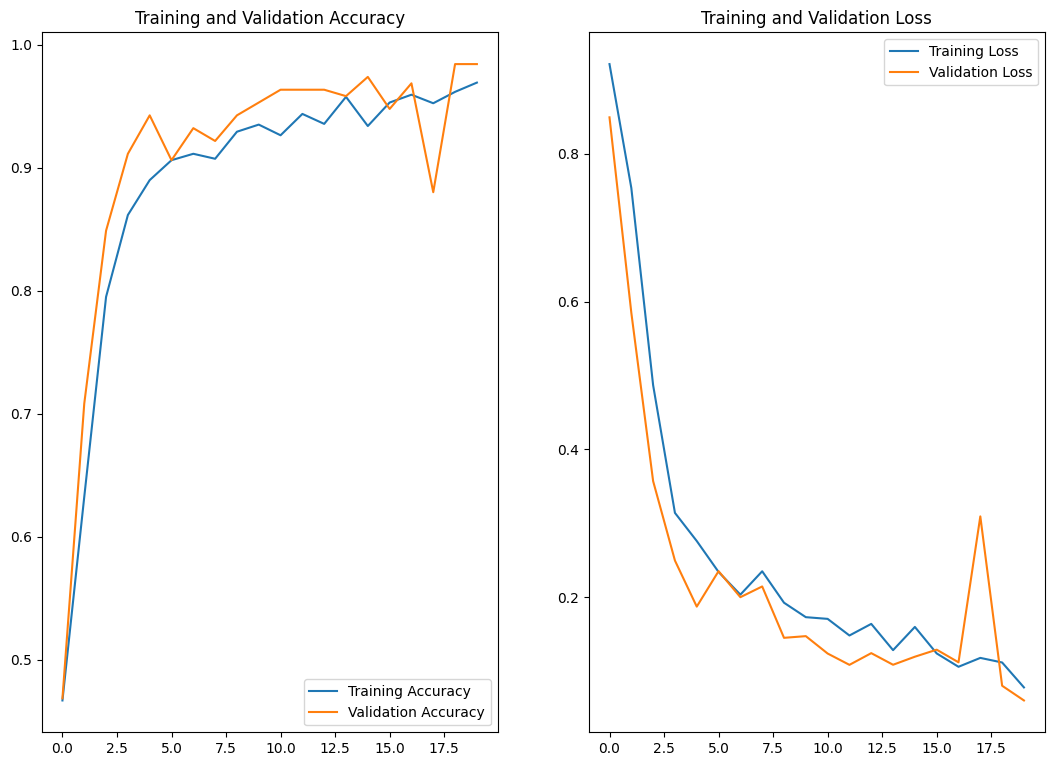

In [21]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (20,20))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# **Run prediction on a sample image**

In [22]:
model = tf.keras.models.load_model('model.h5')

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 749ms/step
predicted label: Potato___Early_blight


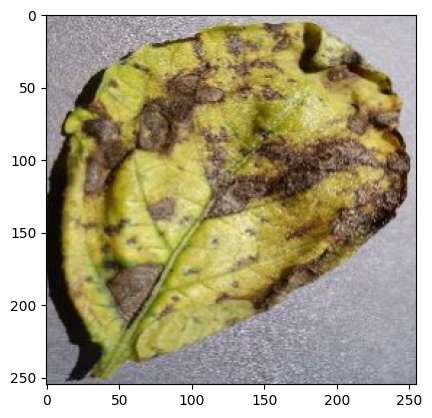

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# **Write a function for inference**

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 52ms/step


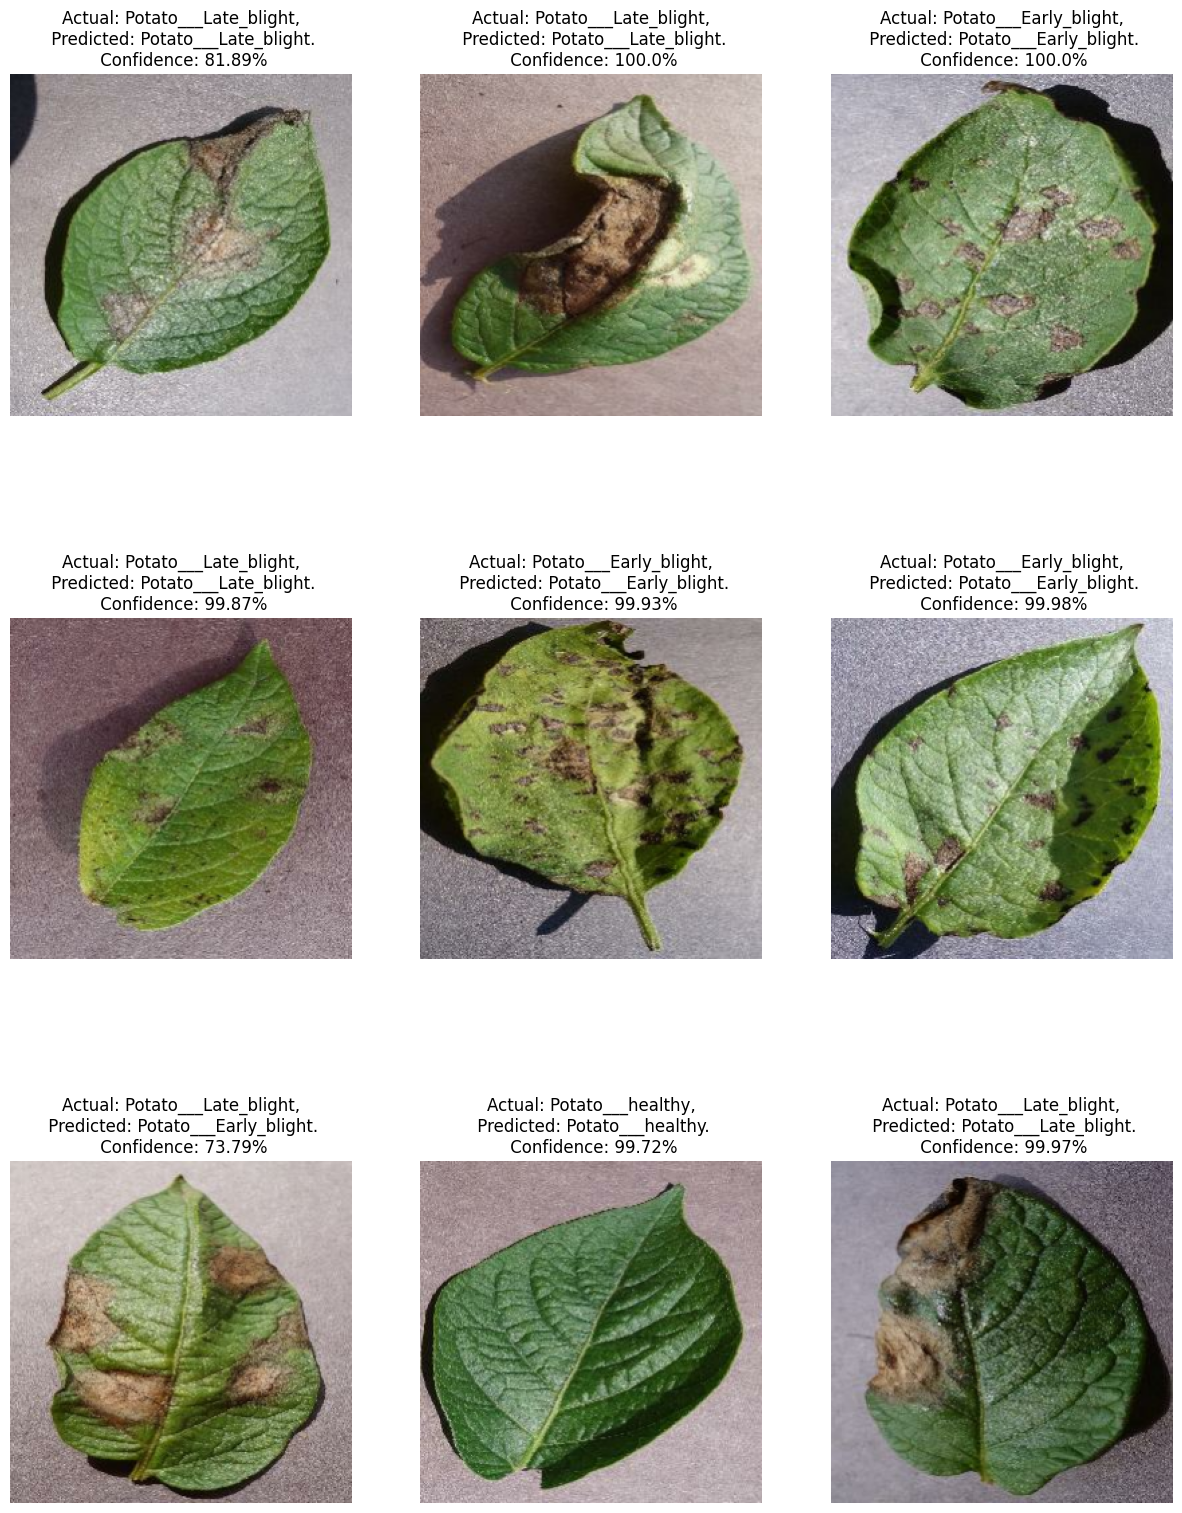

In [24]:
plt.figure(figsize=(15, 20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")